# Code for data analysis section of python coursework

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import probplot
import string
import re
%matplotlib inline

## Load in the data

In [2]:
df = pd.read_csv("opencritic_data_cleaned.csv", index_col = "Unnamed: 0")

df.head()

df.dropna(inplace=True)

df.head()

,name,developer,publisher,genre,release_date,description,critics_average_score,critic_review,date_of_review,critics_score
0,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,There's a category of games I think of as Satu...,2019-10-22 00:00:00,79.0
1,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"With The Outer Worlds, Obsidian has found its ...",2019-10-22 00:00:00,85.0
3,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"A deep, funny, and intricately designed RPG re...",2019-10-29 00:00:00,90.0
4,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,The Outer Worlds marks Obsidian operating at t...,2019-10-22 00:00:00,90.0
6,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,Classic RPG sensibilities enhance wonderful ch...,2019-10-22 00:00:00,93.0


## Research questions to ask of the data 

### This section is before the sentiment analysis model implementation using Naive Bayes and Support Vector Machines (SVM)

### Research question 1:

### What is the correlation between review length and critics scores?

In [3]:
def process_text(text):
    """
    Converts text to lower case, removes all punctuation and finally performed tokenisation

    """
    #apply lowercase
    lower_case_text = text.lower()
    #remove punctuation
    punctuation = string.punctuation
    punc_removed_text = ""
    for letter in lower_case_text:
        if letter not in punctuation:
            punc_removed_text += letter
    #tokenise the text
    tokenised = word_tokenize(punc_removed_text)
    
    return tokenised

def process_word(word):
    """
    Converts word to lower case, removes all punctuation and strips any spaces

    """
    #convert word to lowercase
    lower_case = word.lower()
    
    #remove punctuation
    punctuation = string.punctuation
    punc_removed = ''
    for letter in lower_case:
        if letter not in punctuation:
            punc_removed += letter
    
    #strip spaces on either side of the word
    word_stripped = punc_removed.lstrip().rstrip()
    
    return word_stripped

In [4]:
df2 = df.copy()
#making a copy --> https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#drop null values from critic review and scritics score
df2.dropna(subset=['critic_review', 'critics_score'], inplace=True)

#df2.info() critic_review is an object and critics_score is a float, which are the correct data types

df_q1 = df2.loc[:,['critic_review', 'critics_score']]
#df_q1

#get length of each review by creating a new column with the length of the review
#use process_text function to clean text


df_q1['review_tokenize'] = df_q1.loc[:,'critic_review'].apply(lambda x: process_text(x))

#get length of each review
df_q1['review_length'] = df_q1.loc[:,'review_tokenize'].apply(len)
df_q1


,critic_review,critics_score,review_tokenize,review_length
0,There's a category of games I think of as Satu...,79.0,"[theres, a, category, of, games, i, think, of,...",65
1,"With The Outer Worlds, Obsidian has found its ...",85.0,"[with, the, outer, worlds, obsidian, has, foun...",23
3,"A deep, funny, and intricately designed RPG re...",90.0,"[a, deep, funny, and, intricately, designed, r...",24
4,The Outer Worlds marks Obsidian operating at t...,90.0,"[the, outer, worlds, marks, obsidian, operatin...",25
6,Classic RPG sensibilities enhance wonderful ch...,93.0,"[classic, rpg, sensibilities, enhance, wonderf...",17
...,...,...,...,...
15080,Star Wars Battlefront 2 manages to make nearly...,40.0,"[star, wars, battlefront, 2, manages, to, make...",78
15081,"An engaging campaign, a satisfying arcade mode...",80.0,"[an, engaging, campaign, a, satisfying, arcade...",46
15083,Star Wars Battlefront II is a complete experie...,85.0,"[star, wars, battlefront, ii, is, a, complete,...",59
15084,"I do really enjoy playing this, but when you l...",70.0,"[i, do, really, enjoy, playing, this, but, whe...",24


In [5]:
#statistics for question 1

#mediann and mean review length: there are some outliers as the mean is greater than the median
median_review_length = np.median(df_q1['review_length'])
mean_review_length = np.mean(df_q1['review_length'])
max_review_length = max(df_q1['review_length'])
min_review_length = min(df_q1['review_length'])

#mean and median critics scores
mean_review_score = np.mean(df_q1['critics_score'])
median_review_score = np.median(df_q1['critics_score'])
max_review_score = max(df_q1['critics_score'])
min_review_score = min(df_q1['critics_score'])

stats_table = pd.DataFrame(data={
    'Mean':[round(mean_review_length, 2), round(mean_review_score, 2)], 
    'Median': [median_review_length, median_review_score],
    'Maximum': [max_review_length, max_review_score],
    'Minimum': [min_review_length, min_review_score],
    }, index=['review_length','critics_score'])
                                
stats_table

,Mean,Median,Maximum,Minimum
review_length,50.15,42.0,342.0,2.0
critics_score,82.24,85.0,100.0,15.0


According to the statistics Dataframe, the review length seems to be skewed towards the maximum, while the critics score is skewed towards the minimum score, hence possible outliers towards the maximum review length and minimum critics score

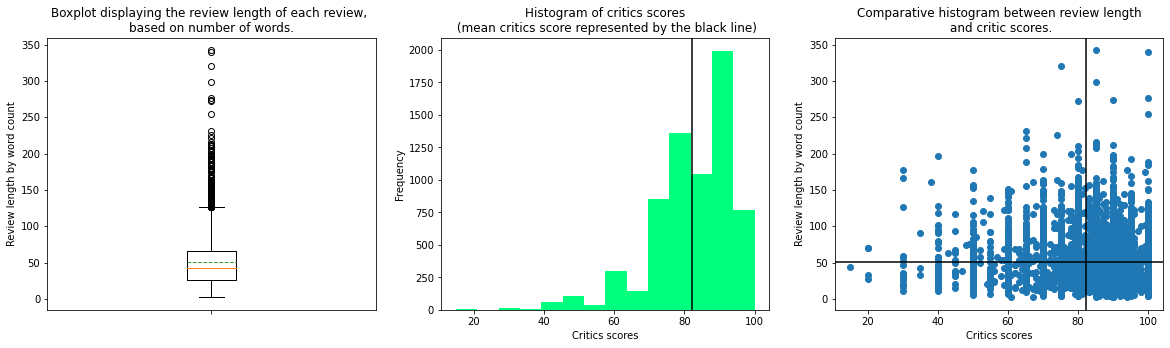

In [6]:
#plot subplots with review length boxplot, critics_score histogram and joint scatterplot for both variables

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
#plot review_length as a boxplot
axs[0].boxplot(x=df_q1['review_length'], showmeans=True, meanline=True)
axs[0].set_title('Boxplot displaying the review length of each review, \nbased on number of words.')
axs[0].set_xticklabels('')
axs[0].set_ylabel('Review length by word count')

#plot critics_score
#plot QQ plot too to show skewness
#and plot axvline on histogram (page 100 stats book for help)
axs[1].hist(df_q1['critics_score'], bins=14, color='springgreen')
axs[1].set_title('Histogram of critics scores\n (mean critics score represented by the black line)')
axs[1].set_xlabel('Critics scores')
axs[1].set_ylabel('Frequency')
axs[1].axvline(x=mean_review_score, color='black')

axs[2].scatter(df_q1['critics_score'], df_q1['review_length'])
axs[2].set_title('Comparative histogram between review length\n and critic scores.')
axs[2].set_xlabel('Critics scores')
axs[2].set_ylabel('Review length by word count')
axs[2].axvline(x=mean_review_score, color='black')
axs[2].axhline(y=mean_review_length, color='black')

plt.show()

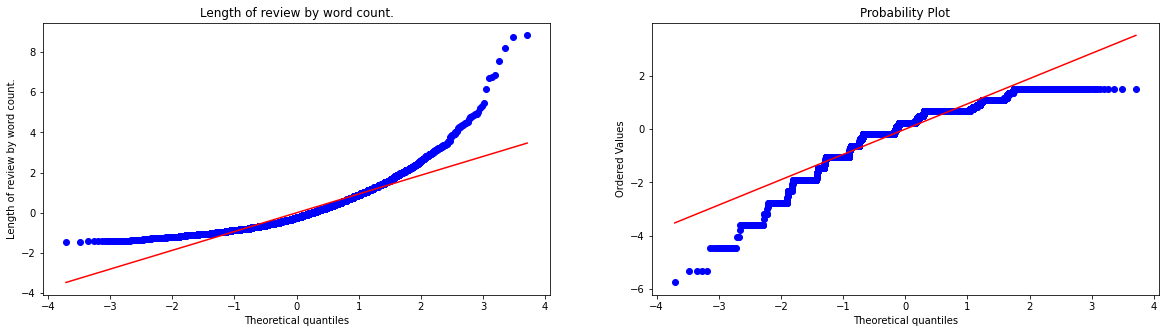

In [7]:
#plot QQ plot for each of the two variables to show presence of skewness
#standardise the variables to make the x and y axis similar in scale

df_q1['normalise_review_length'] = (df_q1['review_length'] - np.mean(df_q1['review_length'])) / np.std(df_q1['review_length'])
df_q1['normalise_critics_score'] = (df_q1['critics_score'] - np.mean(df_q1['critics_score'])) / np.std(df_q1['critics_score'])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
probplot(df_q1['normalise_review_length'], plot=axs[0])
axs[0].set_ylabel('Length of review by word count.')
axs[0].set_title('Length of review by word count.')
probplot(df_q1['normalise_critics_score'], plot=axs[1])

plt.show()

#refer to page 71 of stats book to explain skewness

### Research question 2:

### How many reviews per game and does this number correlate with the average critics score?

In [8]:
#make a copy of original dataframe
df3 = df.copy()

#df3.head()

df_q2_review_count = df3.groupby('name').critic_review.count()
df_q2_ave_critic_score = df3.groupby('name').critics_average_score.mean()

df_q2 = pd.concat([df_q2_review_count, df_q2_ave_critic_score], axis=1)
df_q2

,critic_review,critics_average_score
name,,
Call of Cthulhu,113,67.0
Call of Duty: WWII,120,78.0
Crash Bandicoot N. Sane Trilogy,119,80.0
Deus Ex: Mankind Divided,93,82.0
Donkey Kong Country: Tropical Freeze,103,85.0
Doom,100,86.0
Gears of War 4,106,84.0
Horizon Zero Dawn,125,89.0
Maneater,124,71.0


In [9]:
#statistics

#number of critics reviews per game
mean_number_critics_reviews = np.mean(df_q2['critic_review'])
median_number_critics_reviews = np.median(df_q2['critic_review'])
std_number_critics_reviews = np.std(df_q2['critic_review'])
max_number_critics_reviews = max(df_q2['critic_review'])
min_number_critics_reviews = min(df_q2['critic_review'])

#critics average score
mean_critics_ave_score = np.mean(df_q2['critics_average_score'])
median_critics_ave_score = np.median(df_q2['critics_average_score'])
std_critics_ave_score = np.std(df_q2['critics_average_score'])
max_critics_ave_score = max(df_q2['critics_average_score'])
min_critics_ave_score = min(df_q2['critics_average_score'])

stats_table_1 = pd.DataFrame(data={
    'Mean':[round(mean_number_critics_reviews, 2), round(mean_critics_ave_score, 2)], 
    'Median': [median_number_critics_reviews, median_critics_ave_score],
    'Standard deviation': [round(std_number_critics_reviews, 2), round(std_critics_ave_score, 2)],
    'Maximum': [max_number_critics_reviews, max_critics_ave_score],
    'Minimum': [min_number_critics_reviews, min_critics_ave_score],
    }, index=['Number of reviews','critics average score'])

stats_table_1

,Mean,Median,Standard deviation,Maximum,Minimum
Number of reviews,117.32,117.0,12.91,150.0,93.0
critics average score,81.40,83.0,7.60,95.0,53.0


Explain the reason why the mean critics score in the above code is different from the average critics score scraped from Opencritic (not all reviews considered in the above code as some reviews were scored using stars)

In [10]:
df_q2.loc[:,'critic_review'].values

array([113, 120, 119,  93, 103, 100, 106, 125, 124, 127, 120,  96, 116,
       117, 130, 124, 104, 108, 130, 130, 129, 143, 115, 110, 134,  99,
       101, 108, 133, 102, 100, 132, 131, 102, 113, 118, 118, 128, 122,
       112, 120, 117, 117, 127, 120, 110, 117, 143, 150, 121,  95, 117,
       134, 101, 128, 115, 100], dtype=int64)

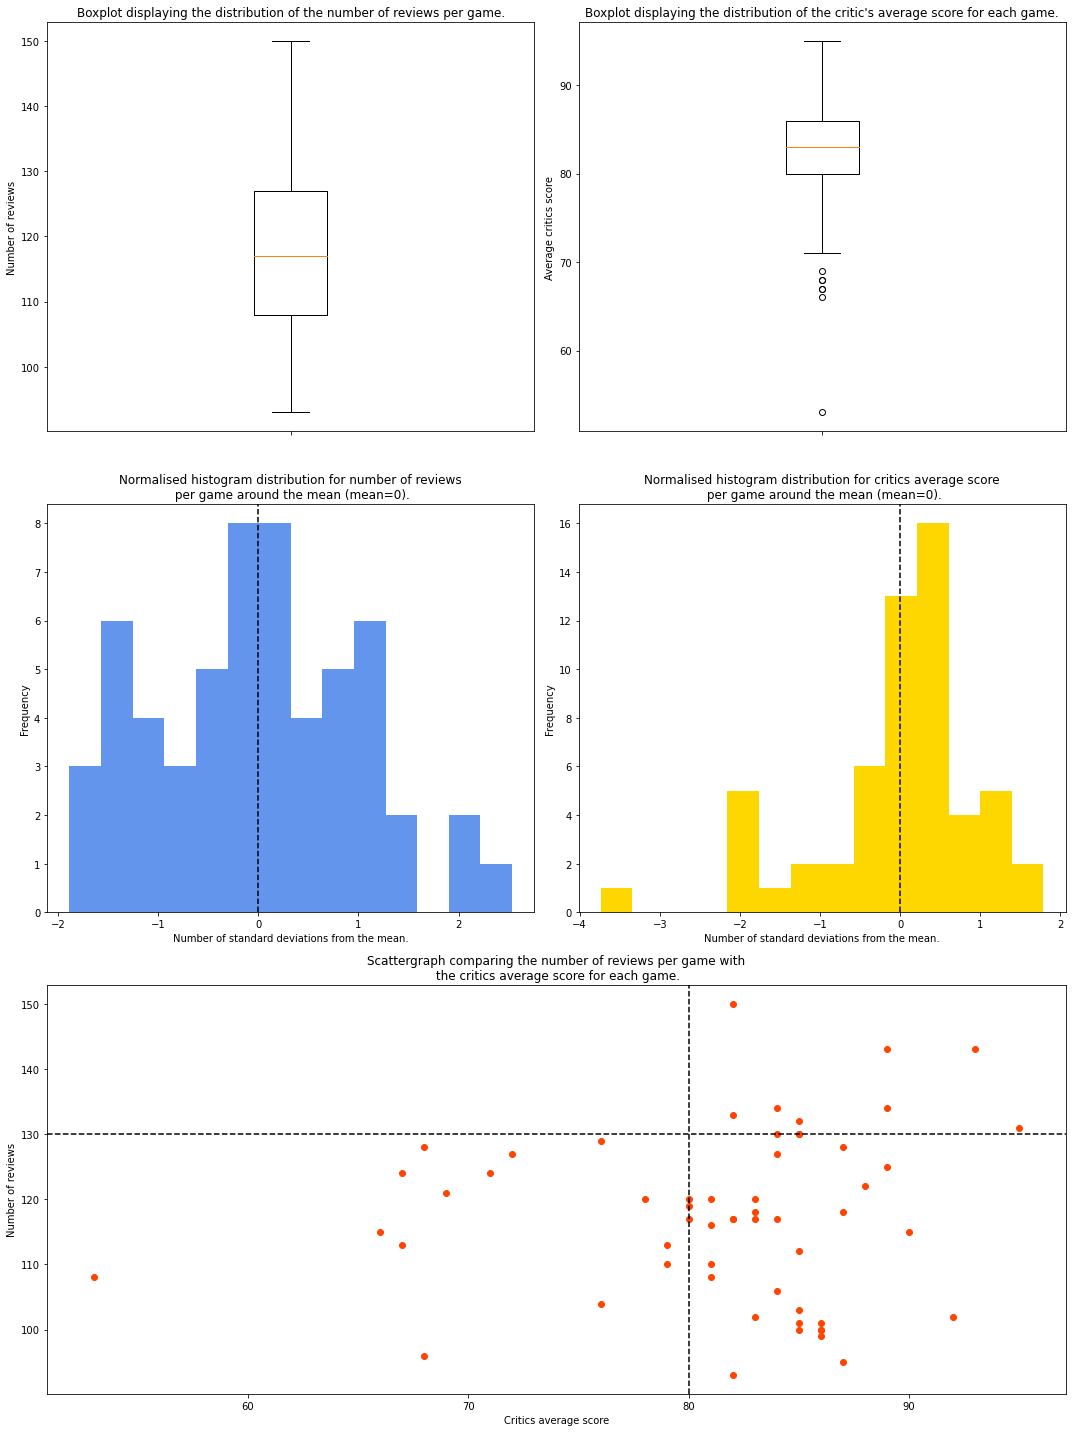

In [11]:
#plot the boxplot for number of reviews and the average critic scores
#also plot the standardised form, with the mean and standard deviation displayed
#display the scatterplot comparing both variables

fig = plt.figure(figsize=(15,20))

gs = gridspec.GridSpec(3, 2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,:])

#plot number of reviews per game
ax1.boxplot(x=df_q2['critic_review'])
ax1.set_title('Boxplot displaying the distribution of the number of reviews per game.')
ax1.set_ylabel('Number of reviews')
ax1.set_xticklabels('')

#plot critics_average_score
ax2.boxplot(x=df_q2['critics_average_score'])
ax2.set_title('Boxplot displaying the distribution of the critic\'s average score for each game.')
ax2.set_ylabel('Average critics score')
ax2.set_xticklabels('')

#normalise distributions using z-score
df_q2['normalise_critic_review'] = (df_q2['critic_review'] - mean_number_critics_reviews) / std_number_critics_reviews
df_q2['normalise_critics_average_score'] = (df_q2['critics_average_score'] - mean_critics_ave_score) /\
                                            std_critics_ave_score

#plot normalised distributions
ax3.hist(df_q2['normalise_critic_review'], bins=14, color='cornflowerblue')
ax3.set_title('Normalised histogram distribution for number of reviews\n per game around the mean (mean=0).')
ax3.set_xlabel('Number of standard deviations from the mean.')
ax3.set_ylabel('Frequency')
ax3.axvline(x=0, color='black', linestyle='--')

ax4.hist(df_q2['normalise_critics_average_score'], bins=14, color='gold')
ax4.set_title('Normalised histogram distribution for critics average score\n per game around the mean (mean=0).')
ax4.set_xlabel('Number of standard deviations from the mean.')
ax4.set_ylabel('Frequency')
ax4.axvline(x=0, color='black', linestyle='--')

#plot scatterplot comparing the two variables
ax5.scatter(df_q2['critics_average_score'], df_q2['critic_review'], color='orangered')
ax5.set_title('Scattergraph comparing the number of reviews per game with\n the critics average score for each game.')
ax5.set_xlabel('Critics average score')
ax5.set_ylabel('Number of reviews')
ax5.axvline(x=80, color='black', linestyle='--')
ax5.axhline(y=130, color='black', linestyle='--')

plt.tight_layout()
plt.show()

In [12]:
#calculated correlation coefficient for the two variables compared above in the scattergraph
corr_coef = np.corrcoef(x=df_q2['critics_average_score'], y=df_q2['critic_review'])
#corr_coef --> poor correlation between the two variables (0.1)

#however, there does appear to be some games that have a number of reviews > 130 but also a score > 80
#all games with average score < 80 have less than 130 reviews
#indicated by the horizontal and vertical dashed lines on the scatterplot 

## Research question 3:

### What are the top words used by critics when writing a review?

In [13]:
#will need to tokenise, remove any punctuation and remove any stopwords

#make a copy of the original dataframe
df4 = df.copy()

#remove punctuation from the reviews (using function created earlier in the notebook) and tokenize
reviews = df4.loc[:,'critic_review']
tokenize_reviews = reviews.apply(lambda x: process_text(x))

#combine all reviews into one text
combined_text = []
for text in tokenize_reviews:
    combined_text.extend(text)
combined_text

['theres',
 'a',
 'category',
 'of',
 'games',
 'i',
 'think',
 'of',
 'as',
 'saturday',
 'morning',
 'cartoon',
 'games',
 'they',
 'lack',
 'depth',
 'but',
 'they',
 'are',
 'fluffy',
 'and',
 'easy',
 'to',
 'enjoy',
 'as',
 'i',
 'look',
 'back',
 'on',
 'some',
 'screenshots',
 'as',
 'pippin',
 'laser',
 'blasts',
 'a',
 'poor',
 'marauder',
 'into',
 'a',
 'pile',
 'of',
 'dust',
 'i',
 'realise',
 'thats',
 'what',
 'the',
 'outer',
 'worlds',
 'is',
 'to',
 'me',
 'if',
 'you',
 'meet',
 'it',
 'on',
 'those',
 'terms',
 'i',
 'think',
 'youll',
 'enjoy',
 'it',
 'with',
 'the',
 'outer',
 'worlds',
 'obsidian',
 'has',
 'found',
 'its',
 'own',
 'path',
 'in',
 'the',
 'space',
 'between',
 'bethesda',
 'and',
 'biowares',
 'rpgs',
 'and',
 'its',
 'a',
 'great',
 'one',
 'a',
 'deep',
 'funny',
 'and',
 'intricately',
 'designed',
 'rpg',
 'reminiscent',
 'of',
 'the',
 'golden',
 'age',
 'of',
 'fallout',
 'when',
 'conversations',
 'mattered',
 'and',
 'comedygrade',
 'c

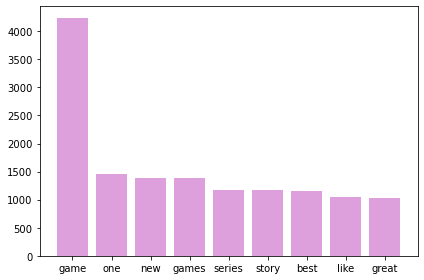

In [14]:
#remove stop words function
def remove_stop_words(text):
    stop_words= stopwords.words("english")
    new_text = []
    for t in text:
        if t not in stop_words:
            new_text.append(t)
    return new_text

stop_words_removed = remove_stop_words(combined_text)
#stop_words_removed_and_tokenized

fdist = FreqDist(stop_words_removed)
top_ten_words = fdist.most_common(11)
top_ten_words.pop(1) #remove punctuation that has appeared in the list
top_ten_words.pop(9) #remove the number 2

unzipped_top_ten_words = list(zip(*top_ten_words))
unzipped_top_ten_words

#plot top ten words
plt.bar(unzipped_top_ten_words[0], unzipped_top_ten_words[1], color='plum')

plt.tight_layout()

## Research question 4:

### What are the top words used by the critics for each publisher?

In [15]:
#df.publisher.nunique()
#33 different publisher --> to group by publisher in a new copy of df

df5 = df.copy()

#remove punctuation and convert publisher to lowercase
#spaces were forming either
df5['publisher_new'] = df5['publisher'].apply(lambda x: process_word(x))


#explain the use of process_word (need for l and rstrip)
df5.publisher_new.nunique()

25

In [16]:
#group the publishers
publishers_grouped = df5.groupby('publisher_new').critic_review.apply(lambda x: ''.join(x))
publishers_grouped

publisher_new
505 games                                Control is set in an engrossingly weird parano...
activision                               Gorgeous guns, a glittering universe, and a gr...
bandai namco entertainment               Little Nightmares 2 delivers similar stealth a...
bandai namco games                       Sprawling level design, thrilling combat, and ...
bethesda softworks                       Vaster, magnetic and more brutal than ever, DO...
bigben interactive                       While occasionally frustrating, The Sinking Ci...
capcom                                   Resident Evil Village is a genuinely engrossin...
deep silver                              Metro Exodus on the PlayStation 5 is more than...
electronic arts                          Mass Effect: Andromeda only occasionally recap...
focus home interactive                   Visually beautiful and emotionally affecting t...
microsoft                                Unless you're looking for a hardcor

In [17]:
#remove punctuation, apply lowercase and tokenize
publishers_grouped = publishers_grouped.apply(lambda x: process_text(x))

#remove stop words
publishers_grouped = publishers_grouped.apply(lambda x: remove_stop_words(x))
publishers_grouped

publisher_new
505 games                                [control, set, engrossingly, weird, paranormal...
activision                               [gorgeous, guns, glittering, universe, great, ...
bandai namco entertainment               [little, nightmares, 2, delivers, similar, ste...
bandai namco games                       [sprawling, level, design, thrilling, combat, ...
bethesda softworks                       [vaster, magnetic, brutal, ever, doom, eternal...
bigben interactive                       [occasionally, frustrating, sinking, citys, co...
capcom                                   [resident, evil, village, genuinely, engrossin...
deep silver                              [metro, exodus, playstation, 5, simple, upgrad...
electronic arts                          [mass, effect, andromeda, occasionally, recapt...
focus home interactive                   [visually, beautiful, emotionally, affecting, ...
microsoft                                [unless, youre, looking, hardcore, 

In [18]:
#obtain top five words used for each publisher

top_5_words_publishers = publishers_grouped.apply(lambda x: dict(FreqDist(x).most_common(5)))
top_5_words_publishers

publisher_new
505 games                                {'game': 81, 'control': 79, '’': 63, 'remedy':...
activision                               {'game': 414, '’': 367, 'duty': 312, 'games': ...
bandai namco entertainment               {'game': 172, 'ball': 132, 'nightmares': 116, ...
bandai namco games                       {'souls': 176, 'dark': 99, 'game': 67, 'iii': ...
bethesda softworks                       {'game': 599, 'new': 254, '2': 235, '’': 228, ...
bigben interactive                       {'sinking': 118, 'city': 115, 'game': 92, '’':...
capcom                                   {'evil': 181, 'village': 129, 'resident': 119,...
deep silver                              {'exodus': 113, 'metro': 89, 'game': 54, '’': ...
electronic arts                          {'game': 200, '2': 126, 'effect': 123, '’': 11...
focus home interactive                   {'game': 148, 'tale': 119, 'plague': 115, 'cth...
microsoft                                {'horizon': 117, '4': 98, 'forza': 

In [19]:
#there is an apostrophe key and number keys that need removing, this will need to be done using regex
pattern = r'[\d]+'

#convert lists in series to strings
def convert_to_string(lst):
    new_string = " ".join(lst)
    return str(new_string)

publishers_grouped = publishers_grouped.apply(lambda x: convert_to_string(x))
publishers_grouped = publishers_grouped.apply(lambda x: re.sub(pattern, "", x))
publishers_grouped = publishers_grouped.apply(lambda x: x.replace('’',""))
publishers_grouped = publishers_grouped.apply(lambda x: process_text(x))
top_5_words = publishers_grouped.apply(lambda x: dict(FreqDist(x).most_common(5)))

In [20]:
top_5_words

publisher_new
505 games                                {'game': 81, 'control': 80, 'remedy': 52, 'one...
activision                               {'game': 414, 'duty': 312, 'games': 247, 'new'...
bandai namco entertainment               {'game': 172, 'ball': 132, 'nightmares': 116, ...
bandai namco games                       {'souls': 176, 'dark': 99, 'game': 67, 'iii': ...
bethesda softworks                       {'game': 599, 'new': 254, 'one': 201, 'doom': ...
bigben interactive                       {'sinking': 118, 'city': 115, 'game': 92, 'wor...
capcom                                   {'evil': 181, 'village': 129, 'resident': 120,...
deep silver                              {'exodus': 113, 'metro': 89, 'game': 54, 'worl...
electronic arts                          {'game': 200, 'effect': 123, 'wars': 109, 'and...
focus home interactive                   {'game': 148, 'tale': 119, 'plague': 115, 'cth...
microsoft                                {'horizon': 117, 'forza': 73, 'raci

C:\Users\jimma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


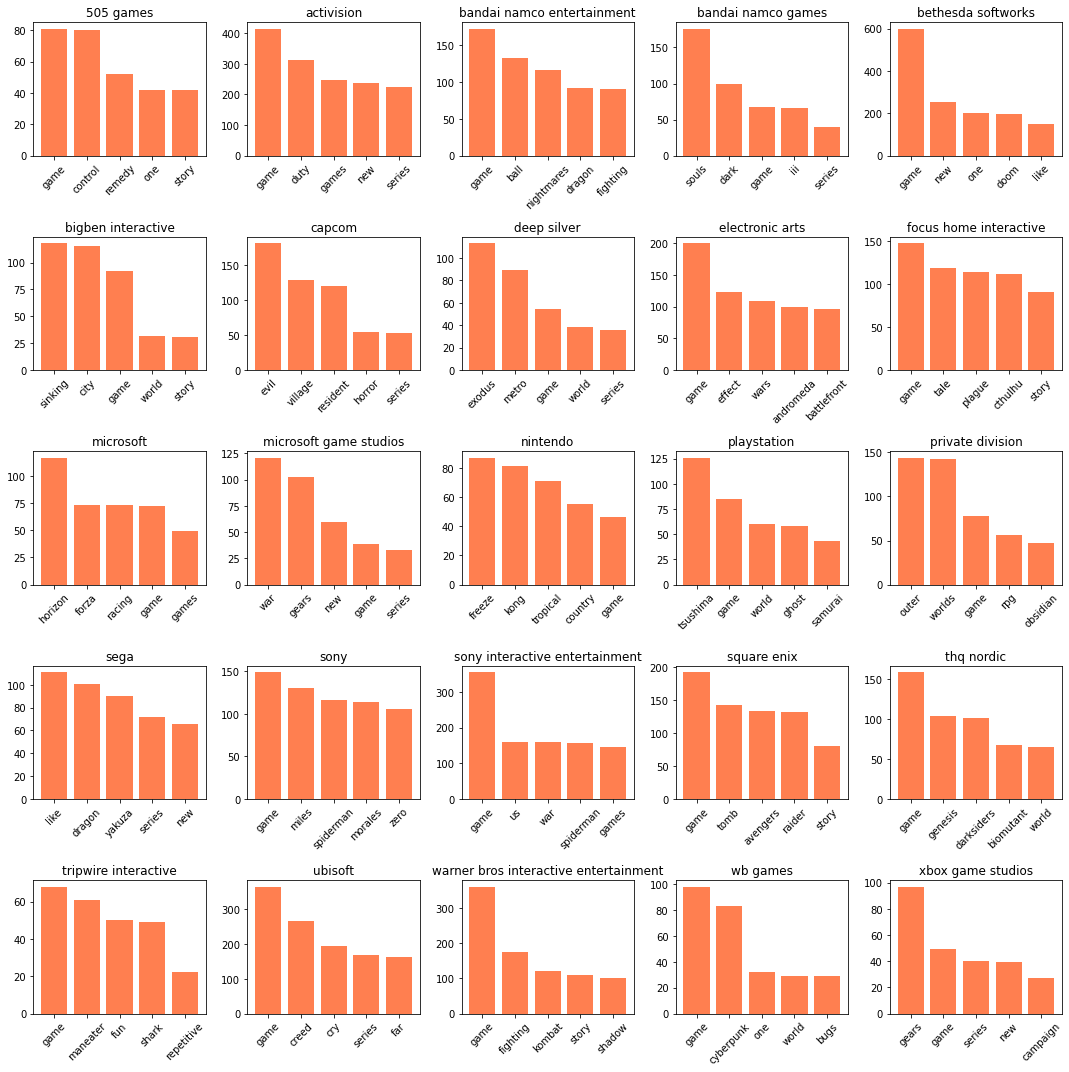

In [21]:
#plot top 5 words by publisher
top_5_words_vals = top_5_words.values
top_5_words_index = top_5_words.index
len(top_5_words_vals)

fig, ax = plt.subplots(5,5,figsize=(15,15))
ax = ax.flatten()

for i in range(len(top_5_words)):
    ax[i].bar(top_5_words_vals[i].keys(), top_5_words_vals[i].values(), color='coral')
    ax[i].set_title(top_5_words_index[i])
    ax[i].set_xticklabels(top_5_words_vals[i].keys(), rotation=45)

plt.tight_layout()
plt.show()

#top words use are indicative of the current games being discussed in the reviews

## Research question 5:

### What are the most frequest positive and negative words?

If time permits, calculate by publisher too.

In [ ]:
df6 = df.copy()

